In [2]:

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


In [3]:

mnist = keras.datasets.mnist
(X_train_full, y_train_full),(X_test,y_test) = mnist.load_data()


In [4]:

X_valid, X_train = X_train_full[:5000] / 255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255


In [5]:

class_names = ["0","1","2","3","4","5","6","7","8","9"]


In [6]:

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))


2023-09-19 19:00:30.194368: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-19 19:00:30.814800: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [7]:

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])


# Early Stopping :-

In [8]:

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', min_delta=0.05, verbose=1, patience=5, restore_best_weights=True)


In [11]:

history = model.fit(X_train, y_train, epochs=30, validation_data = (X_valid, y_valid), batch_size=32, callbacks=[early_stopping])


Epoch 1/30
1719/1719 [==============================] - 36s 16ms/step - loss: 0.6150 - accuracy: 0.8394 - val_loss: 0.3066 - val_accuracy: 0.9130
Epoch 2/30
1719/1719 [==============================] - 29s 17ms/step - loss: 0.2891 - accuracy: 0.9174 - val_loss: 0.2398 - val_accuracy: 0.9316
Epoch 3/30
1719/1719 [==============================] - 31s 18ms/step - loss: 0.2345 - accuracy: 0.9329 - val_loss: 0.2006 - val_accuracy: 0.9416
Epoch 4/30
1719/1719 [==============================] - 32s 19ms/step - loss: 0.1997 - accuracy: 0.9435 - val_loss: 0.1826 - val_accuracy: 0.9498
Epoch 5/30
1719/1719 [==============================] - 32s 18ms/step - loss: 0.1743 - accuracy: 0.9504 - val_loss: 0.1574 - val_accuracy: 0.9550
Epoch 6/30
1719/1719 [==============================] - 33s 19ms/step - loss: 0.1541 - accuracy: 0.9569 - val_loss: 0.1426 - val_accuracy: 0.9608
Epoch 7/30
1719/1719 [==============================] - 33s 19ms/step - loss: 0.1381 - accuracy: 0.9611 - val_loss: 0.1345 -

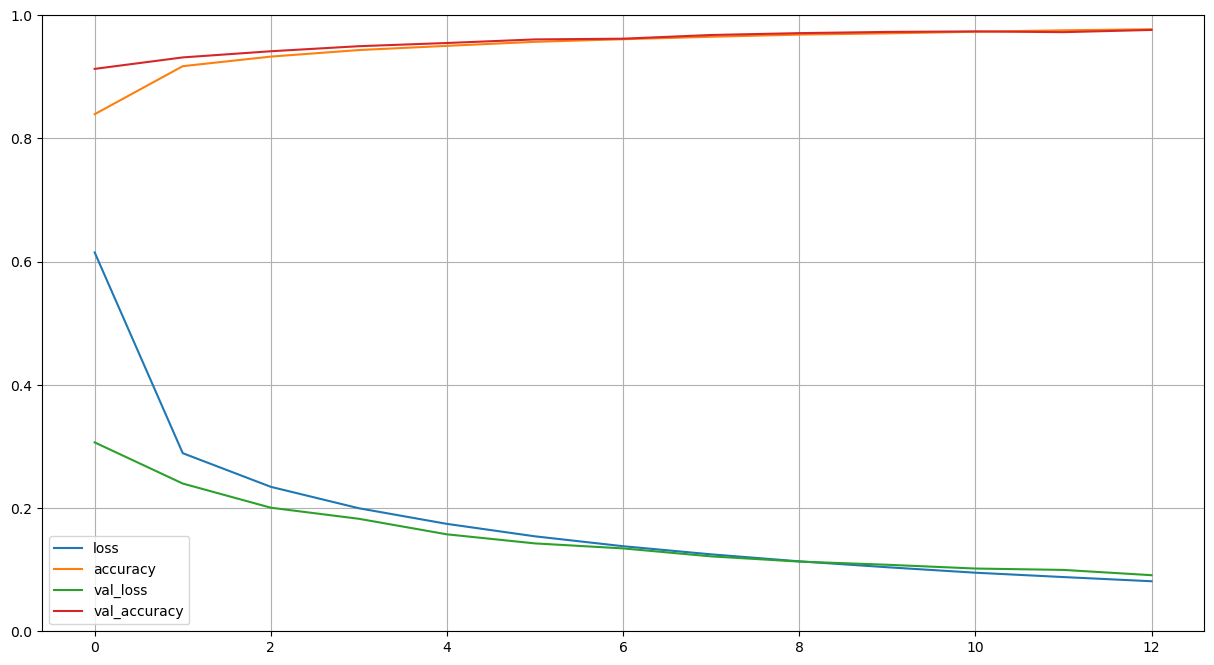

In [12]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(15,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()
